# Case study on WHO data

# Context: 
DeltaSquare is a leading consultancy company with numerous outlets across the USA. They have been diligently collecting data. They are now planning to use all this data to automate a crucial part of Operations. A major factor that affects the purchasing power of their customers is the salary. The Director of Operations at DeltaSquare wants to do away with this process and leverage the data to predict whose salary is very high that i.e. above 50,000$ / year. This pilot project has been given to you, the resident Data Scientist at DeltaSquare.

# Objective:
Objective : To predict whether the salary of a person will be greater than 50K dollars or Less than 50K dollars from the characteristic details of people 

# Key Questions :

1 - What are the different factors that influence salary?

2 - How accurate are the predictions using the model?


# Dataset:

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt:This weight is assigned by  Current Population Survey (CPS).People with similar demographic characteristics should have similar weights, since it is a feature aimed to allocate similar weights to people with similar demographic characteristics -  continuous 
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Load Libraries

In [183]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
%matplotlib inline

### Load data

In [184]:
data = pd.read_csv("who_data.csv")

In [185]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marrital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [186]:
df = data.copy()

In [187]:
# lets look at structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marrital status         32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital gain            32561 non-null  int64 
 11  capital loss            32561 non-null  int64 
 12  working hours per week  32561 non-null  int64 
 13  native-country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

* We see that names of the columns have spaces, dots and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity along column names
* Dependent variable is salary which is of categorical type
* age, capital gain and capital loss are of integer type while other variable are of categorical type

In [188]:
# fixing the names of columns as there are dots, spaces  in columns names
df.columns =[col.replace(' ','_') for col in df.columns]
df.columns =[col.replace('-','_') for col in df.columns]
df.columns =[col.replace('.','') for col in df.columns]

In [189]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marrital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')


* column names are fixed

In [190]:
# let us look at the shape of the data
df.shape

(32561, 15)

* There are 32561 rows and 15 variables


In [191]:
# Summary of dataset
df.describe(include='all')

,age,workclass,fnlwgt,education,education_no_of_years,marrital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
count,32561.00,32561,32561.00,32561,32561.00,32561,32561,32561,32561,32561,32561.00,32561.00,32561.00,32561,32561
unique,nan,9,nan,16,nan,7,15,6,5,2,nan,nan,nan,42,2
top,nan,Private,nan,HS-grad,nan,Married-civ-spouse,Prof-specialty,Husband,White,Male,nan,nan,nan,United-States,<=50K
freq,nan,22696,nan,10501,nan,14976,4140,13193,27816,21790,nan,nan,nan,29170,24720
mean,38.58,NaN,189778.37,NaN,10.08,NaN,NaN,NaN,NaN,NaN,1077.65,87.30,40.44,NaN,NaN
std,13.64,NaN,105549.98,NaN,2.57,NaN,NaN,NaN,NaN,NaN,7385.29,402.96,12.35,NaN,NaN
min,17.00,NaN,12285.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,NaN,NaN
25%,28.00,NaN,117827.00,NaN,9.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
50%,37.00,NaN,178356.00,NaN,10.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
75%,48.00,NaN,237051.00,NaN,12.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,45.00,NaN,NaN


* The average age of people in our dataset is 38.58 years
* The average education in years is 10 years
* The salary is skewed variable. Most of the people earn less than  50K and very few earn above 50K
* Mode of relationship is Husband
* The average working hours per week is 40 hours with standard deviation of 12 hours
* Average capital gain is 1077.64 dollar with standard deviation of 7385 dollar. This indicates that there very high varaibility in capital gain.
* The average capital loss is 87 dollar with standard deviation of 402 dollar

In [192]:
# Check for missing values
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marrital_status           0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

* There are no NaN (missing values) in any of the column

**Lets us look at different levels in categorical variables**

In [193]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

* ? indicates missing values. we will replace this values with "unknown"

In [194]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [195]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

* ? indicates missing values. we will replace this values with "unknown"

In [196]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [197]:

df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [198]:
# let us fix '?' in workclass and native country, we will replace that with unknown
df.workclass = df.workclass.apply(lambda x: 'Unknown' if x == ' ?' else x)
df.native_country = df.native_country.apply(lambda x: 'Unknown' if x == ' ?' else x)
df.occupation = df.occupation.apply(lambda x: 'Unknown' if x == ' ?' else x)

In [199]:
# let us look at country
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'Unknown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [200]:
## Country Combining
## There are a lot of countries here, we can reduce them to their respective continents.
df.native_country = df.native_country.str.replace(' ','') # remove empty spaces from strings

In [201]:
north_america  = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                   "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                   "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                   "United-States"]
asia  = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          "Philippines", "Taiwan", "Thailand", "Vietnam"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands",
            "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
            "Yugoslavia"]
other  = ["South", "Unknown","?"]

In [202]:
def region_combining(x):
    if x in north_america:
        return 'north_america'
    elif x in asia:
        return 'asia'
    elif x in south_america:
        return 'south_america'
    elif x in europe:
        return 'europe'
    elif x in other:
        return 'other'
    else:
        return x

In [203]:
df['native_country'] = df['native_country'].apply(region_combining)

In [204]:
# data manipulation for marrital_status
# We can reduce these factors into the following groups:

#- Married
#- Not-Married
#- Never-Married
df.marrital_status = df.marrital_status.str.replace(' ','') # remove empty spaces from strings
married = ['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent']
not_married = ['Divorced','Separated','Widowed']
def reduce_marital_status(x):
    if x in married:
        return 'married'
    elif x in not_married:
        return 'not_married'
    else:
        return x


In [205]:
df.marrital_status = df.marrital_status.apply(reduce_marital_status)

In [206]:
df.marrital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

# Perfoming EDA

## Univariate Analysis

In [207]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

**Exploring Age**

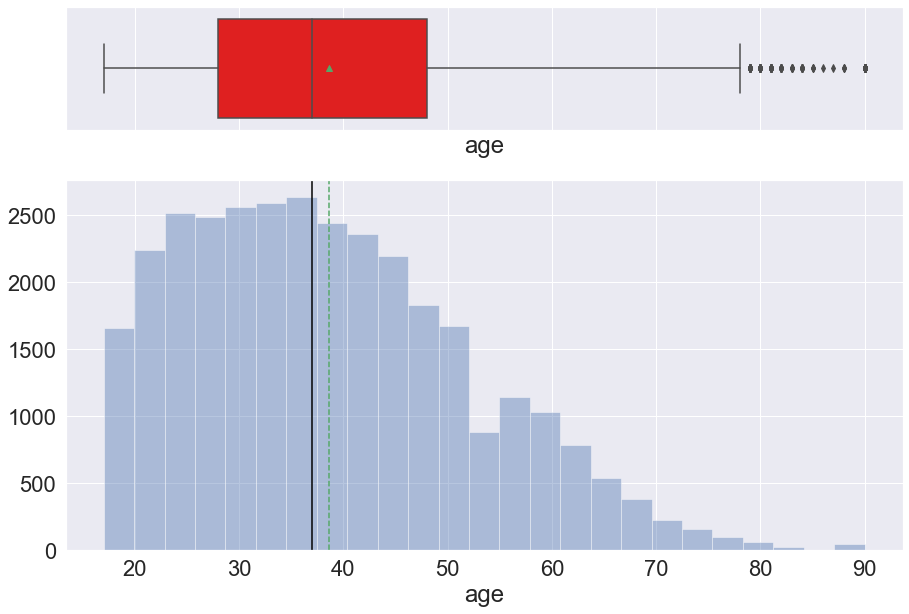

In [208]:

histogram_boxplot(df.age,bins=25);

* The age variable is slightly right skewed and it has some outliers
* The average age of people is around 38 years

**let us look at distribution of fnlwght**

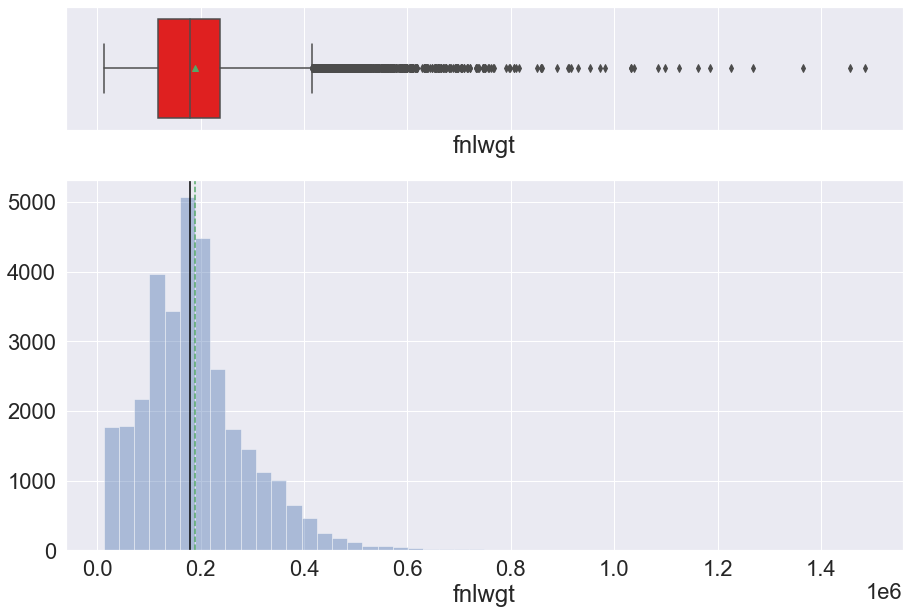

In [209]:

histogram_boxplot(df.fnlwgt)

* fnlwght is right skewed. It has lots of outliers on right side which we will cap. We suspect that this variable will not be significant in predicting salary of person as this number indicates demographic details of population of a region

**let us look at distribution of capital gain**

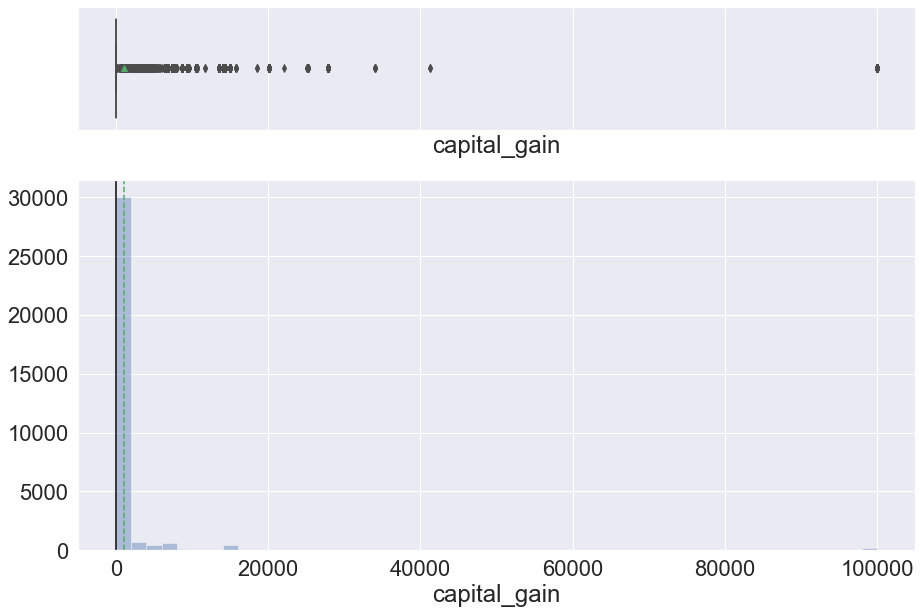

In [210]:

histogram_boxplot(df.capital_gain)

* capital_gain is a continuous variable describing gain from financial investments. Histograms shows that the distributions of this variable is highly skewed.
* Capital gain is right skewed
* Majority of observation have 0 capital_gain but there are some observations where capital gain is higher than 5000 , these are outliers

In [211]:
# Lets look at quantiles of capital gain
df.capital_gain.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1])

0.10       0.00
0.20       0.00
0.30       0.00
0.40       0.00
0.50       0.00
0.60       0.00
0.70       0.00
0.80       0.00
0.90       0.00
0.95    5013.00
0.99   15024.00
1.00   99999.00
Name: capital_gain, dtype: float64

* majority observation have 0 as capital gain

**let us look at distribution of capital loss**

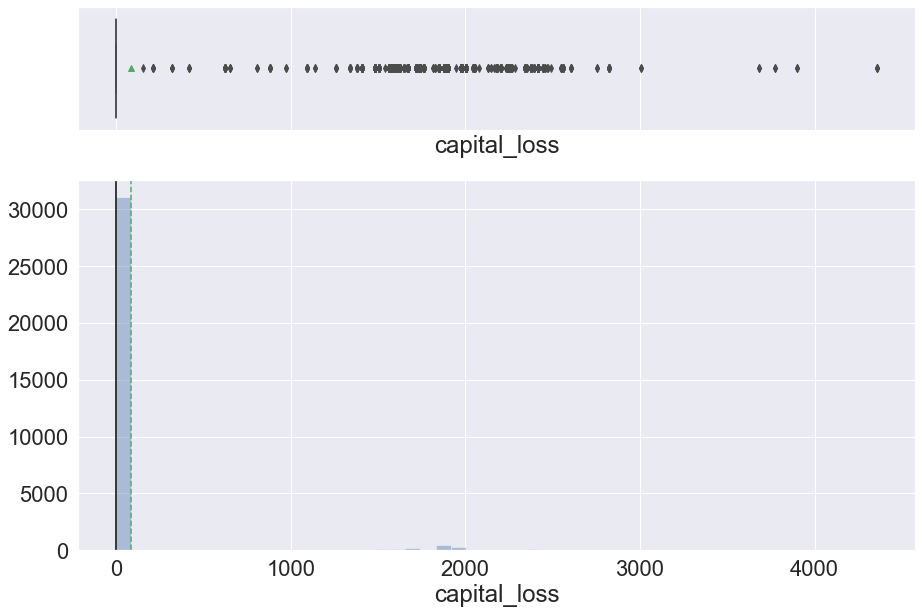

In [212]:
histogram_boxplot(df.capital_loss)

* capital_loss is continuous variable describing loss from financial investments. Histograms show that the distributions of this variables is highly skewed.
* Majority observation has 0 capital loss but it is right skewed because of some outliers

In [213]:
# Lets us look at quantile of capital loss
df.capital_loss.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99,1])

0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50      0.00
0.60      0.00
0.70      0.00
0.80      0.00
0.90      0.00
0.95      0.00
0.98   1902.00
0.99   1980.00
1.00   4356.00
Name: capital_loss, dtype: float64

**let us look at distribution of working hours per week**

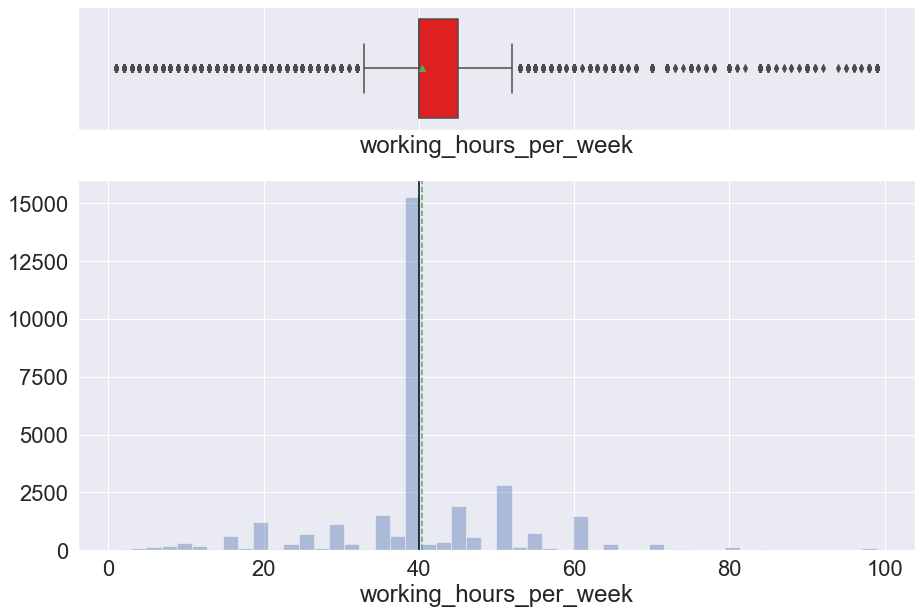

In [214]:

histogram_boxplot(df.working_hours_per_week)

* Mean working hours is around 38 hours per week
* Working hours have outliers on both sides

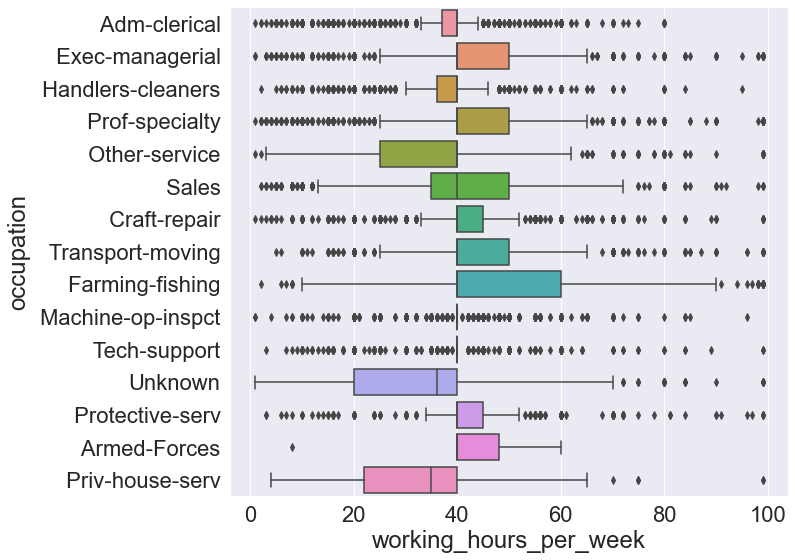

In [215]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(10,9))
sns.boxplot(y="occupation", x="working_hours_per_week", data=df)

There is high variation in working hours per week for different occupation,  more than 75% of people with occupations as farming-fishing, executive manager and Prof-speciality, put in more than 40 hours per week.

**lets us look at salary distribution**

Salary distribution 
  <=50K   0.76
 >50K    0.24
Name: salary, dtype: float64


Text(0, 0.5, 'count')

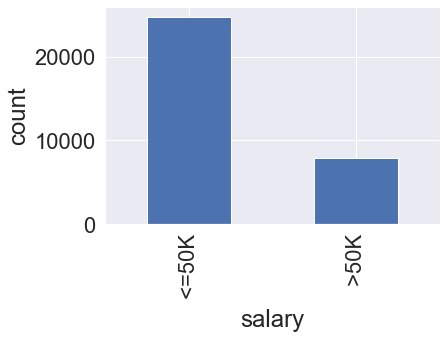

In [216]:

print('Salary distribution \n',df['salary'].value_counts(normalize= True))
df['salary'].value_counts().plot(kind='bar')
plt.xlabel('salary')
plt.ylabel('count')

* 24% of the observations have salary above 50K and while 76% have salary below 50K

## Bivariate analysis

### education vs salary

salary          <=50K   >50K    All
education                          
 10th             871     62    933
 11th            1115     60   1175
 12th             400     33    433
 1st-4th          162      6    168
 5th-6th          317     16    333
 7th-8th          606     40    646
 9th              487     27    514
 Assoc-acdm       802    265   1067
 Assoc-voc       1021    361   1382
 Bachelors       3134   2221   5355
 Doctorate        107    306    413
 HS-grad         8826   1675  10501
 Masters          764    959   1723
 Preschool         51      0     51
 Prof-school      153    423    576
 Some-college    5904   1387   7291
All             24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


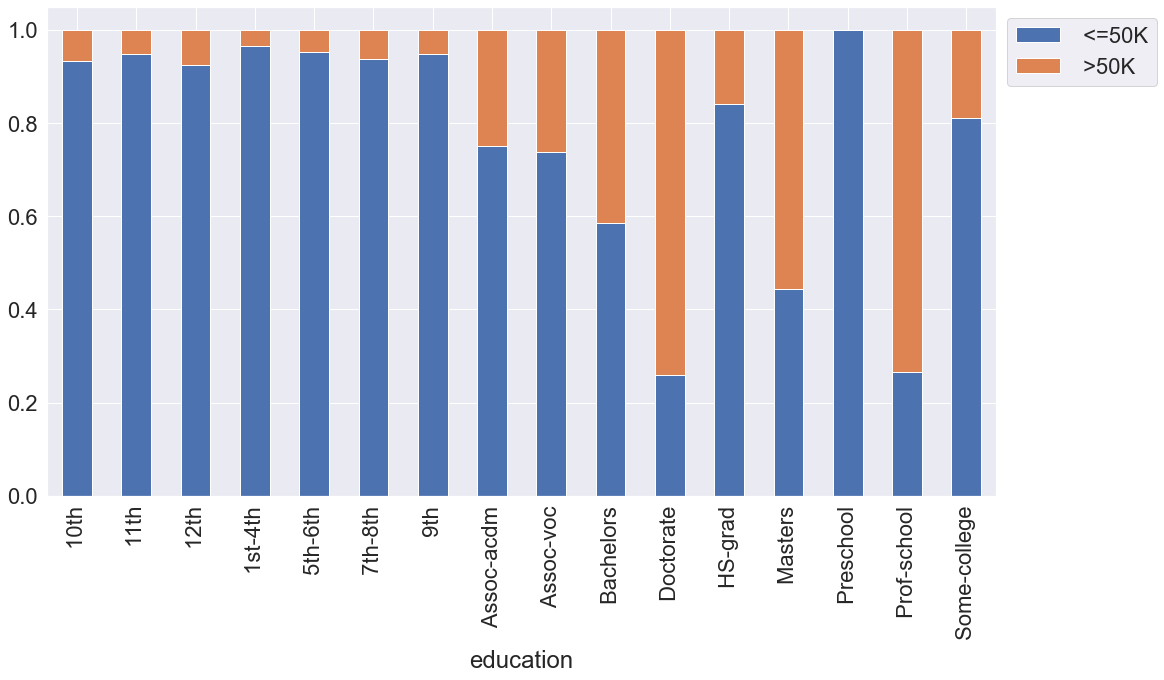

In [217]:
tab1 = pd.crosstab(df.education,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.education,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));


* People who are doctors and graduate from Professional school program (Prof-school) have 70% likelihood of having salary above $50K


## Occupation vs Salary

salary               <=50K   >50K    All
occupation                              
 Adm-clerical         3263    507   3770
 Armed-Forces            8      1      9
 Craft-repair         3170    929   4099
 Exec-managerial      2098   1968   4066
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Machine-op-inspct    1752    250   2002
 Other-service        3158    137   3295
 Priv-house-serv       148      1    149
 Prof-specialty       2281   1859   4140
 Protective-serv       438    211    649
 Sales                2667    983   3650
 Tech-support          645    283    928
 Transport-moving     1277    320   1597
Unknown               1652    191   1843
All                  24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


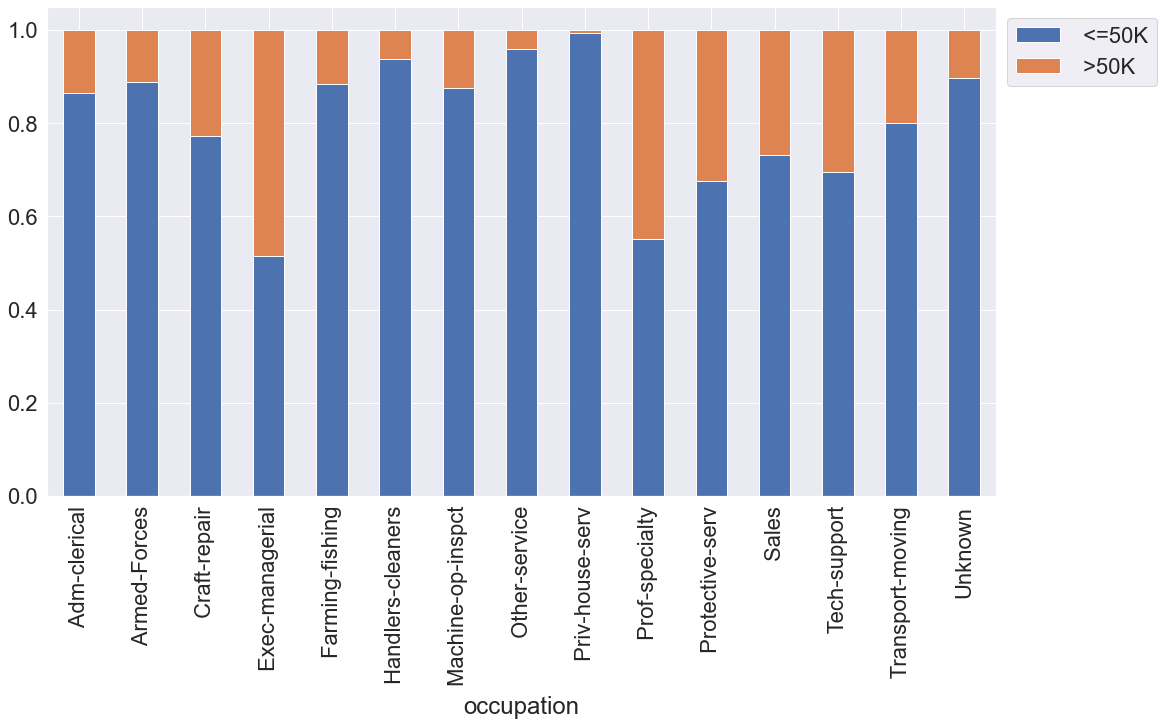

In [218]:
tab1 = pd.crosstab(df.occupation,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.occupation,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

- People whose occupation is of Executive Manager and Professor-speciality have likelihood of around 40% to have salary above $50,000
- People with occupations like Private house service,handels-cleaners, farming-fishing have higher likelihood of having below 50K salary

### race vs salary 

salary                <=50K   >50K    All
race                                     
 Amer-Indian-Eskimo     275     36    311
 Asian-Pac-Islander     763    276   1039
 Black                 2737    387   3124
 Other                  246     25    271
 White                20699   7117  27816
All                   24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


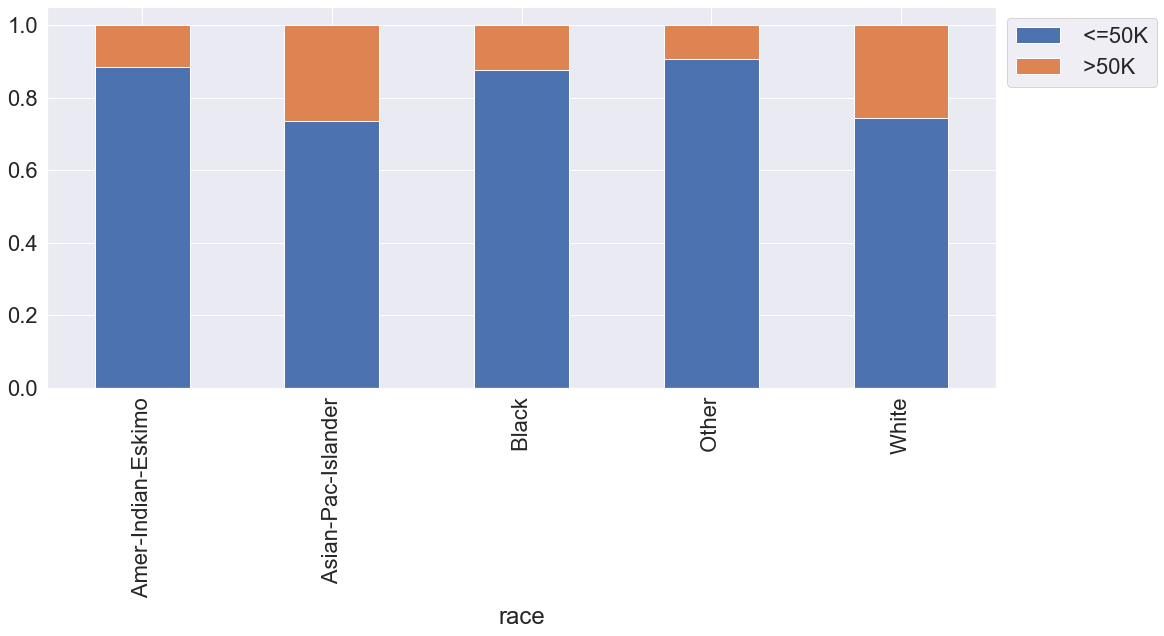

In [219]:
tab1 = pd.crosstab(df.race,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.race,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

* White and Asia-Pacific people have around 25% likelihood of having more than 50K salary which is higher than other race

### Let us see what is the average education years for different salary group .

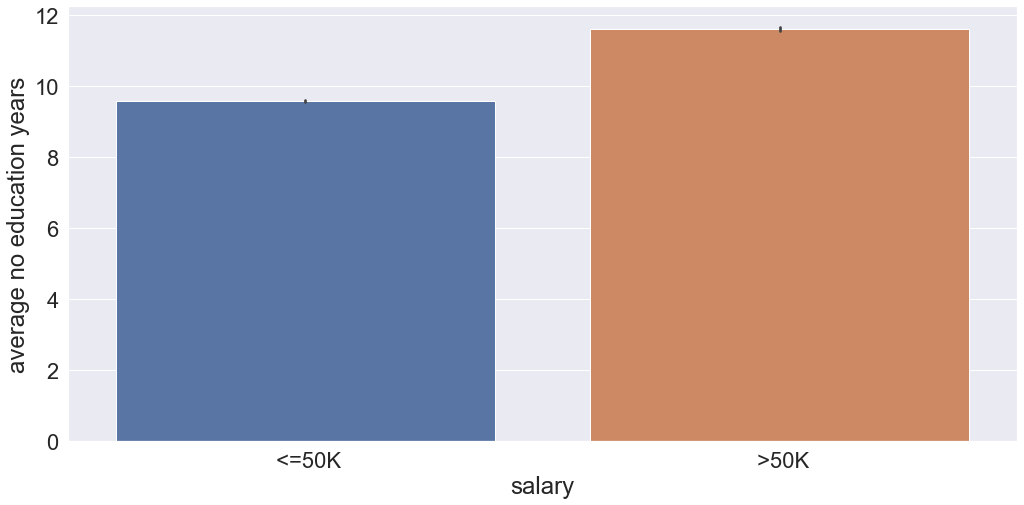

In [220]:
plt.figure(figsize=(17,8))
sns.barplot(x=df.salary,y=df.education_no_of_years)
plt.ylabel('average no education years');

* People with above 50K salary have on average 11 years of education while people with below 50K salary have on an average 9.5 years of education, indicating that people who are highly educated tend to have higher salary

### Let us see How does proportion of different work class vary across different salary group.

salary              <=50K   >50K    All
workclass                              
 Federal-gov          589    371    960
 Local-gov           1476    617   2093
 Never-worked           7      0      7
 Private            17733   4963  22696
 Self-emp-inc         494    622   1116
 Self-emp-not-inc    1817    724   2541
 State-gov            945    353   1298
 Without-pay           14      0     14
Unknown              1645    191   1836
All                 24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


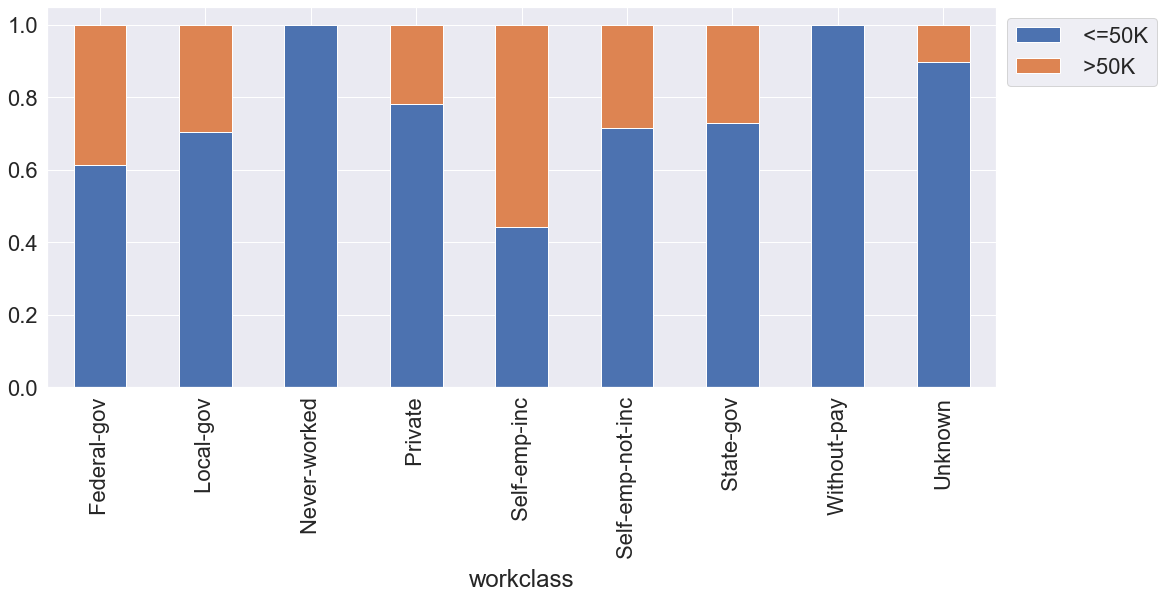

In [221]:
tab1 = pd.crosstab(df.workclass,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.workclass,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

* Self Employed people have almost 60% likelihood of getting salary above 50K followed by federal govt employee who have 40% likelihood of getting 50K salary followed by Local govt employee who have around 30% likelihood of getting salary higher than 50k.

### Let us see How does porportion of different marital status vary different salary group 

salary            <=50K   >50K    All
marrital_status                      
Never-married     10192    491  10683
married            8681   6736  15417
not_married        5847    614   6461
All               24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


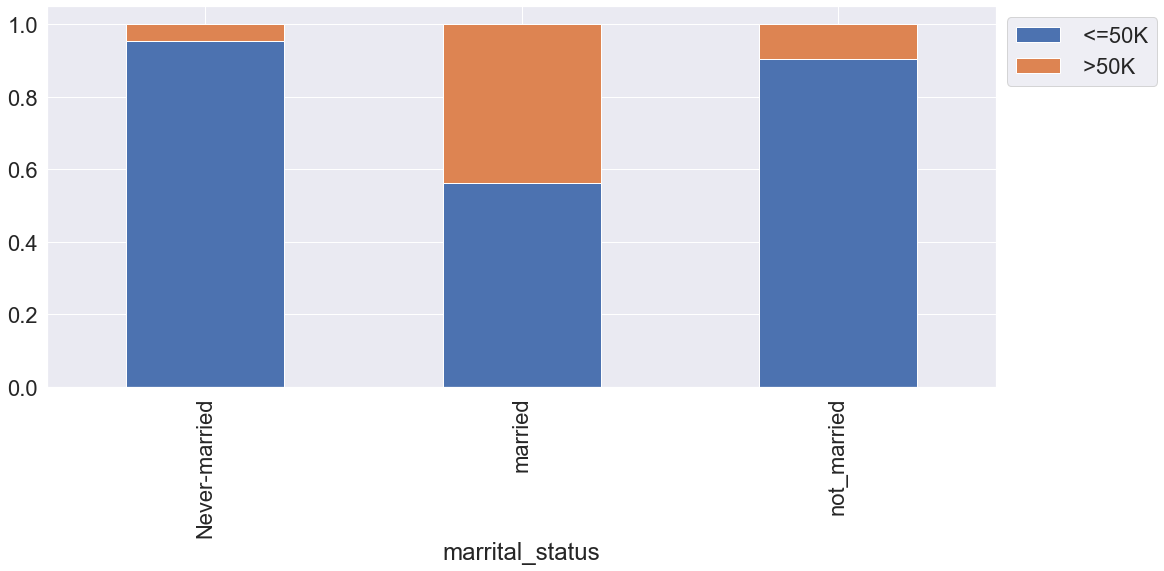

In [222]:
tab1 = pd.crosstab(df.marrital_status,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.marrital_status,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

* Married people have higher likelihood of getting salary above 50K compared to Never Married and Not married people.

### Let us see how does proportion of different relation status vary different salary group 

salary            <=50K   >50K    All
relationship                         
 Husband           7275   5918  13193
 Not-in-family     7449    856   8305
 Other-relative     944     37    981
 Own-child         5001     67   5068
 Unmarried         3228    218   3446
 Wife               823    745   1568
All               24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


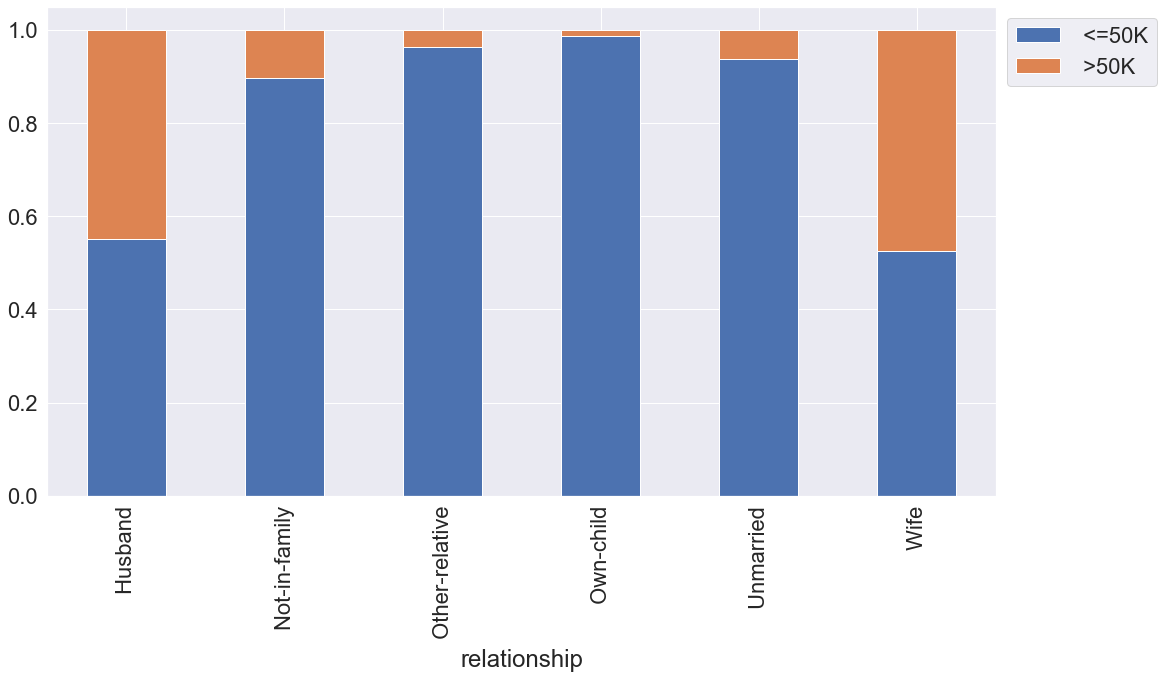

In [223]:
tab1 = pd.crosstab(df.relationship,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.relationship,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

* Again Husband , or Wife who happens to be married have higher likelihood of having salary above 50K compared to other

### Let us see how does proportion of different native country vary across different salary group

salary           <=50K   >50K    All
native_country                      
asia               465    206    671
europe             369    152    521
north_america    23275   7313  30588
other              501    162    663
south_america      110      8    118
All              24720   7841  32561
------------------------------------------------------------------------------------------------------------------------


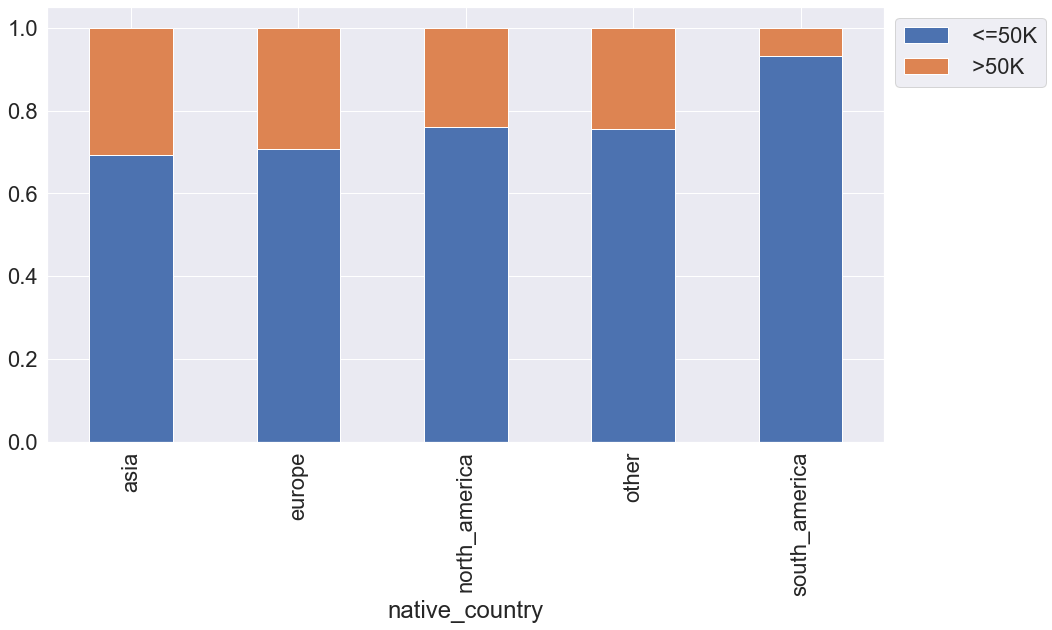

In [224]:
tab1 = pd.crosstab(df.native_country,df.salary,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.native_country,df.salary,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observations**
* Self employed people have 50% chances of having  above 50K salary and federal-govt employee have 30% likelihood of having above 50K salary
* Unemployed people who have never worked or without-pay have earning less than 50K
* Married people have higher likelihood of having above  50K salary in term of relationship.
* Majority of people who have more than 50K salary work 45 hours to 75 hours
* people from asian and european countries have around 25% likelihood to have salary above 50K
* male have higher likelihood of getting above 50K salary
* married people have higher likelihood of getting above 50K salary in term of marital status while never married have least likelihood of getting above 50K salary


### Let us see what is the disribution of age for different salary group ?

In [225]:
plt.figure(figsize=(15,7))
sns.histplot(df, x="age", hue="salary",stat='density',kde=True,discrete=True);


AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 1080x504 with 0 Axes>

* People who more than 50K salary are generally older having average age around 48 years
* People who have less than 50K salary have average age around 36

### Let us see how does distribution of age vary for different marital status group ?

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(data = df, x="age", hue="marrital_status",stat='density',kde=True,discrete=True)


* Never - married people tend to be younger in age. They have mean around 25 years
* Not-married people who are either divorced, or separated or widowed are slight older than married people

In [ ]:
# lets us look at normalized chart of age vs marital status
plt.figure(figsize=(15,9))
sns.displot(
    data=df,
    x="age", hue="marrital_status",
    kind="kde", #height=6,
    multiple="fill", #clip=(0, None),
    #palette="ch:rot=-.25,hue=1,light=.75"
    height=8.27, aspect=11.7/8.27
);

* Majority of Never-married people are young and are around 25 years old
* As the age increases people marry and therefore  (Never-married people) proportion decreases which agrees with our understanding

### Let us see how does the education years vary for different salary group ?

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df, x="education_no_of_years", hue="salary",stat='density',kde=True,discrete=True)


* Majority of those people having salary above 50K have education of more than 8 years
* There is peak at education years of 13 year for People having above 50K salary indicating that large number of them have 13 years of education

### Let us see how does average working hours vary for different salary group ?

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df, x="working_hours_per_week", hue="salary",stat='density',kde=True,discrete=True)

* Majority of people having above 50K salary work around 38 hours per week 

In [ ]:
# let us look at mean working hours per week
plt.figure(figsize=(17,8))
sns.barplot(x='salary',y="working_hours_per_week",data=df)
plt.ylabel('mean working hours per week');

* people with above 50K salary on an average work 7 hours more weekly than people with less than 50K salary
* People with above 50k salary work on an average 45 hours per week

In [ ]:
plt.figure(figsize=(17,8))
sns.boxplot(x='salary',y="working_hours_per_week",data=df)
plt.ylabel('working hours per week');

* Majority of people with above 50K salary work more hours per week than majority of people with above 50K salary

* 75% of people with above 50K salary have more woking hours per week than 75% of people with less than 50K salary
* 1st quantile of boxplot of above 50K group is higher than 3rd quantile of boxplot of below 50K group.

### Scatter plot capital gain and working hours

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=df.working_hours_per_week,y=df.capital_gain,hue=df.salary)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

* Majority of people with above 50K salary have greater than 5000 capital gain while majority of people having below 50K salary have less than 5000 capital gain

### how does distribution of capital gain vary for different salary group ?

In [ ]:

g =sns.displot(data=df, x="capital_gain", hue="salary",
            height=8.07, aspect=11.7/8.27      
           );
g;



* Majority of people above 5000 capital gain have salary greater than 50K
* Majority of people with below 50K salary have less than 2500 capital gain

## Lets look at outliers in every numerical column

In [ ]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Age,fnlwgt , capital gain and capital loss have upper outliers 
* education_no_years has lower outliers 
* working_hours_per_week has both upper and lower outliers

## Treating Outliers

In [226]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [227]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

  
# items to be removed 
unwanted= {'capital_gain', 'capital_loss'} # these column have very few non zero observation , doing outlier treatment would remove those observation so we are keeping it as it is
  
numerical_col = [ele for ele in numerical_col if ele not in unwanted] 
df = treat_outliers_all(df,numerical_col)

### Correlation Plot

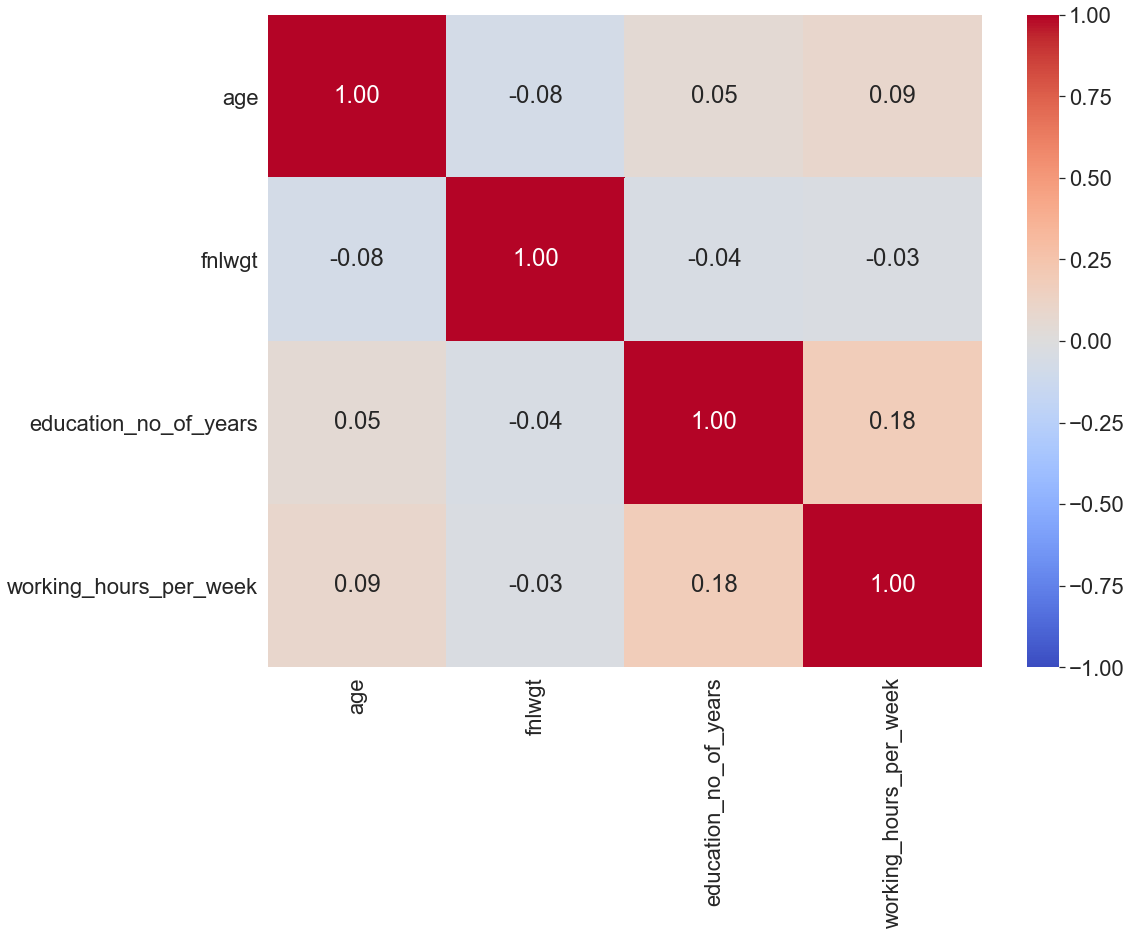

In [228]:
corr = df[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

* High correlation was not found between any numerical column

In [229]:
# Lets fix the data type for model building
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32561 non-null  int64  
 1   workclass               32561 non-null  object 
 2   fnlwgt                  32561 non-null  int64  
 3   education               32561 non-null  object 
 4   education_no_of_years   32561 non-null  float64
 5   marrital_status         32561 non-null  object 
 6   occupation              32561 non-null  object 
 7   relationship            32561 non-null  object 
 8   race                    32561 non-null  object 
 9   sex                     32561 non-null  object 
 10  capital_gain            32561 non-null  int64  
 11  capital_loss            32561 non-null  int64  
 12  working_hours_per_week  32561 non-null  float64
 13  native_country          32561 non-null  object 
 14  salary                  32561 non-null

**Fixing categorical variables**

In [230]:
# converting categorical varaible to category type
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

categorical_variables = df.select_dtypes(exclude=["number","bool_"]).columns.tolist() # list of categorical varaibles
for colmn in categorical_variables:
    df[colmn] = df[colmn].astype('category')

# Model Building

### Logistic Regression Using sklearn

In [231]:
## Defining X and Y variables
X = df.drop(['salary'], axis=1)
Y = df[['salary']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y['salary'] = Y.salary.apply(lambda x: x==' >50K').astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30)

In [232]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   58.5s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

**Let's look at Model Performances**

**Prediction on train**

In [233]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['above 50K','below 50K']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



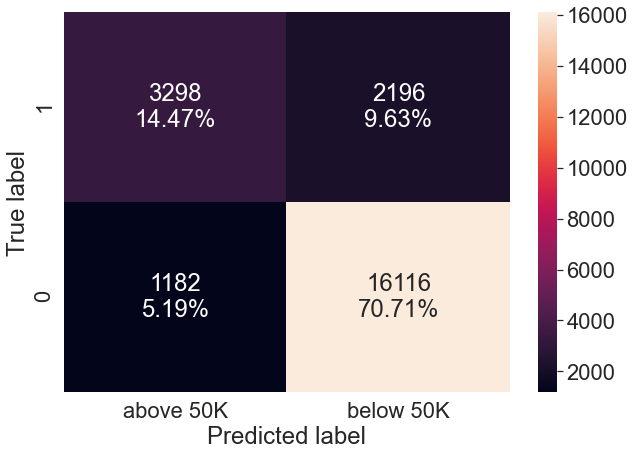

In [234]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

**Prediction on test set**

confusion matrix = 



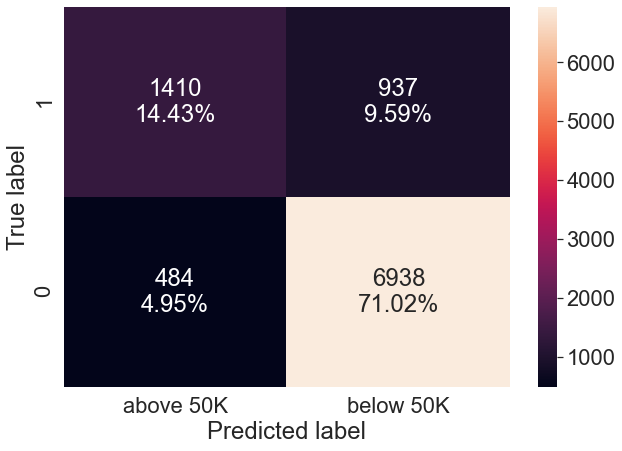

In [235]:
#Predict for test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [236]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))


Accuracy on train data: 0.8517901017901018
Accuracy on test data: 0.8545398710205753


**AUC ROC curve**

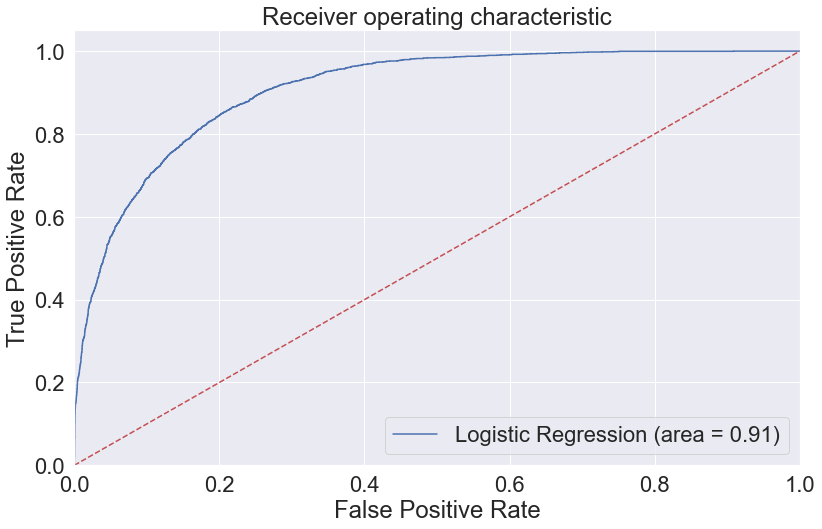

In [237]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Optimal threshold**

In [238]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.22186454477670833


In [239]:
target_names = ['below 50K', 'above 50K']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

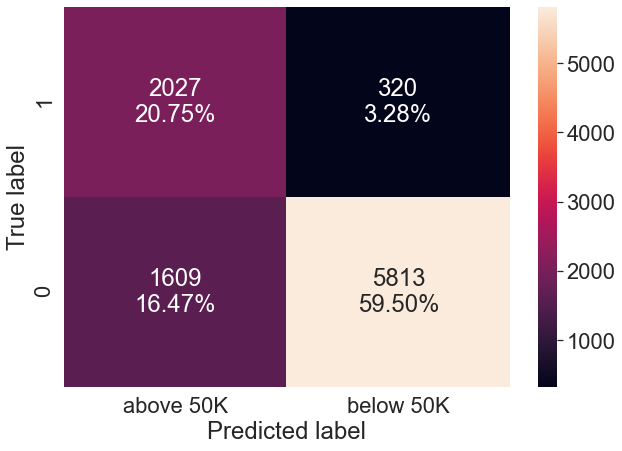

In [240]:
make_confusion_matrix(y_test,y_pred_ts)

In [241]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))


Accuracy on train data: 0.803088803088803
Accuracy on test data: 0.8025386426451019


**Observation**
* After using optimal threshold we see that true positives have increased from 14% to 20%. and false positive has decreased from 9.43% to 3.43%



### Check for multicollinearity

# Let us ensure that Multicollinearity doesn't exist

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [242]:
# let us select numerical columns
#numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

In [243]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [244]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                            0.00
age                              1.65
fnlwgt                           1.04
education_no_of_years             inf
capital_gain                     1.06
capital_loss                     1.02
working_hours_per_week           1.27
workclass_ Local-gov             3.11
workclass_ Never-worked           inf
workclass_ Private               7.83
workclass_ Self-emp-inc          2.20
workclass_ Self-emp-not-inc      3.59
workclass_ State-gov             2.31
workclass_ Without-pay           1.02
workclass_Unknown                 inf
education_ 11th                   inf
education_ 12th                   inf
education_ 1st-4th                inf
education_ 5th-6th                inf
education_ 7th-8th                inf
education_ 9th                    inf
education_ Assoc-acdm             inf
education_ Assoc-voc              inf
education_ Bachelors              inf
education_ Doctorate              inf
education_ HS-g

There is inf (infinity) is several dummy columns which indicated perfect collinearity. We will drop those varaibles

In [245]:
# droping variables of perfect collinearity
variables_with_prefect_collinearity = vif_series1[vif_series1.values==np.inf].index.tolist()
num_feature_set = num_feature_set.drop(variables_with_prefect_collinearity,axis=1)

In [246]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                           348.58
age                               1.60
fnlwgt                            1.03
capital_gain                      1.04
capital_loss                      1.02
working_hours_per_week            1.25
workclass_ Local-gov              1.96
workclass_ Private                3.73
workclass_ Self-emp-inc           1.59
workclass_ Self-emp-not-inc       2.25
workclass_ State-gov              1.56
workclass_ Without-pay            1.01
marrital_status_married          13.83
marrital_status_not_married       1.92
occupation_ Armed-Forces          1.00
occupation_ Craft-repair          2.04
occupation_ Exec-managerial       1.90
occupation_ Farming-fishing       1.36
occupation_ Handlers-cleaners     1.37
occupation_ Machine-op-inspct     1.49
occupation_ Other-service         1.67
occupation_ Priv-house-serv       1.04
occupation_ Prof-specialty        1.87
occupation_ Protective-serv       1.24
occupation_ Sales            

**We observe that marrital_status_married ,relationship_ Not-in-family,race_ Black and race_ White  exhibit high multicollinearity.**

Notice that all 4 of these are dummy variables and we can't drop them, because how can one class of a variable be multicollinear, so we will proceed with all of these variables 

## Build the logistic regression model 

**Split into training and test set**

In [247]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30)

**Building Logistic Regression model from statsmodels**

In [248]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.335713
         Iterations 17


**Let us look at summary**

In [249]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22751
Method:                           MLE   Df Model:                           40
Date:                Sun, 27 Dec 2020   Pseudo R-squ.:                  0.3904
Time:                        16:36:32   Log-Likelihood:                -7651.6
converged:                       True   LL-Null:                       -12551.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -7.7038      0.444    -17.348      0.000      -8.574      -6.833
age                               0.0218      0.002     11.840      0.000 

## interpretation of coefficients with respect to work_hours per week

* coefficient of  work_hours per week  is 0.0690
- Since the coefficient is positive therefore increase in work_hours per week results in increase in likelihood of getting salary above 50K


* 1 unit increase in work_hours per week increases the log odds of salary above 50K  by 0.069
* This relates to changes in odds by 7.14% 

Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %
(np.exp(0.069)-1)*100 = 7.14%
Probability = odd/(1+odd)



So we can say for a one-unit increase in work_hours per week, we expect to see about 6.90% increase in the odds of earning above 50K. In terms of probability there is 87.7% probability of earning above 50K

* Similarly we can interpret other variables
* Variable with positive coefficient indicates that increase in their value would increase the probability of getting salary higher than 50K. As we can see variables like capital_gain,working_hours_per_week,race_ White etc has positive coefficient.
* Variable with negative coefficient indicates that increase in their value would decrease the probability of getting salary higher than 50K. As we can see variables like workclass_ Local-gov,occupation_ Transport-moving,race_ Other etc has negative coefficient.


#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [250]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [251]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
occupation_ Prof-specialty,1.41,4.09,0.80,0.00
relationship_ Wife,1.24,3.44,0.77,0.00
marrital_status_married,1.20,3.33,0.77,0.00
occupation_ Exec-managerial,1.14,3.13,0.76,0.00
race_ Asian-Pac-Islander,1.05,2.86,0.74,0.00
occupation_ Tech-support,0.97,2.65,0.73,0.00
race_ White,0.92,2.50,0.71,0.00
sex_ Male,0.82,2.28,0.70,0.00
occupation_ Protective-serv,0.64,1.90,0.66,0.00
occupation_ Sales,0.48,1.62,0.62,0.00


* As we can see above , for person with Doctorate degree the probability of having salary above 50K is 100%
- Similarly we can interpret other variables

**Lets look at most significant variable**

In [252]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['occupation_ Prof-specialty', 'relationship_ Wife', 'marrital_status_married', 'occupation_ Exec-managerial', 'occupation_ Tech-support', 'sex_ Male', 'occupation_ Protective-serv', 'occupation_ Sales', 'marrital_status_not_married', 'working_hours_per_week', 'age', 'capital_loss', 'capital_gain', 'workclass_ Self-emp-not-inc', 'occupation_ Machine-op-inspct', 'relationship_ Not-in-family', 'occupation_ Handlers-cleaners', 'occupation_ Other-service', 'relationship_ Unmarried', 'occupation_ Farming-fishing', 'relationship_ Other-relative', 'relationship_ Own-child', 'const']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['occupation', 'relationship', 'marrital_status', 'sex', 'working_hours_per_week', 'capital_gain', 'capital_loss', 'workclass']


### Prediction of the model



**Prediction on Train data**

In [253]:
pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

confusion matrix = 



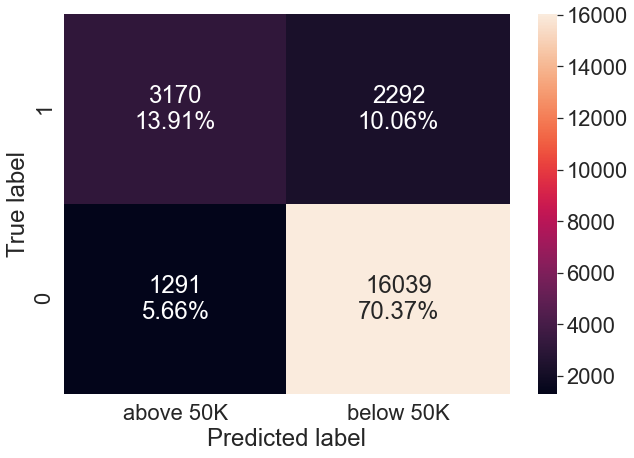

In [254]:
print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train )

**Prediction on Test data**

confusion matrix = 



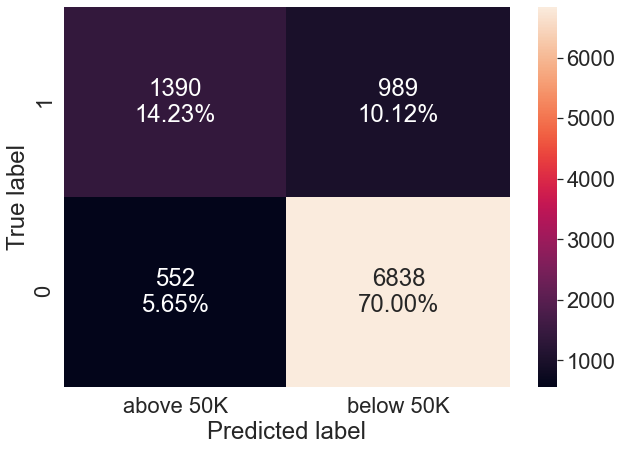

In [255]:
pred_ts = lg.predict(X_test)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_ts )

In [256]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))


Accuracy on train data: 0.8427957177957178
Accuracy on test data: 0.8422561162862114


### AUC ROC Curve

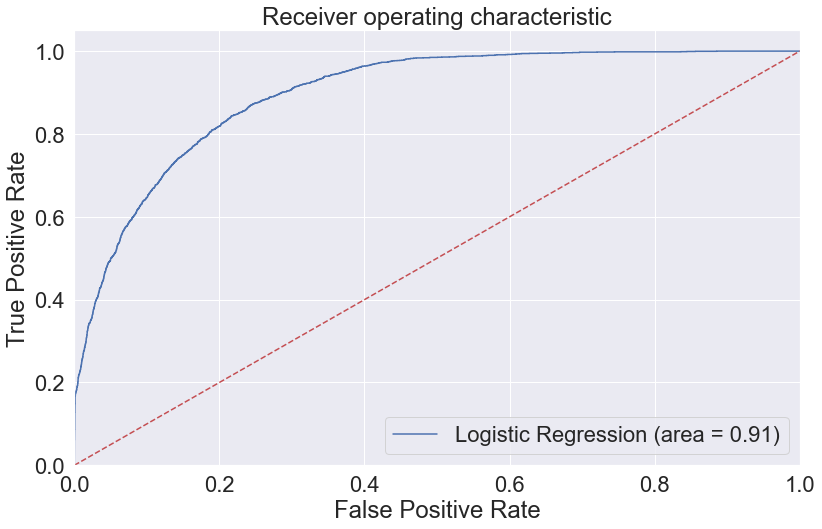

In [257]:

fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Choosing Optimal threshold

In [258]:
pred_train = lg.predict(X_train)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.22931757321055846


In [259]:
target_names = ['below 50K', 'above 50K']
y_pred_tr = (lg.predict(X_train)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(X_test)>optimal_threshold).astype(int)

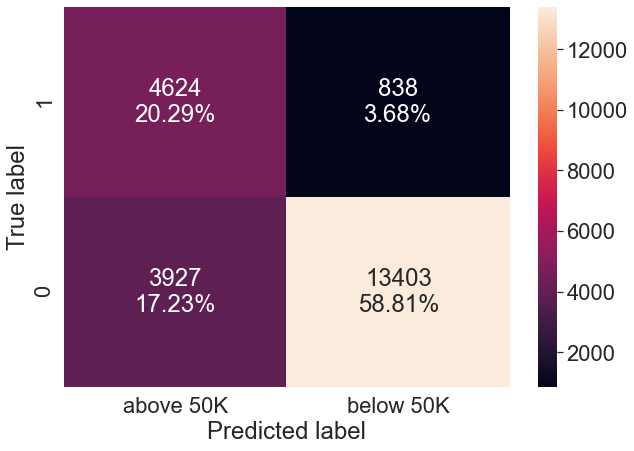

In [260]:
make_confusion_matrix(y_train,y_pred_tr )

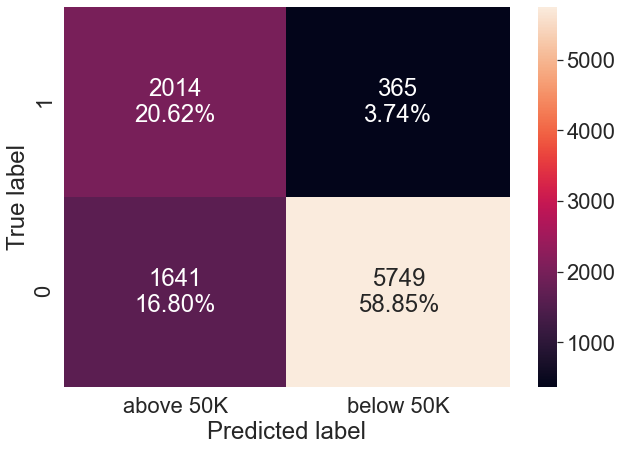

In [261]:
make_confusion_matrix(y_test,y_pred_ts)

In [262]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(y_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test,y_pred_ts))

Accuracy on train data: 0.7909354159354159
Accuracy on test data: 0.7946565666905517


**Observation**
* After choosing optimal threshold , true positives has increased from 14% to 20% while false positive has decreased from 10% to 3%
* The accuracy on test data is 78% after removing multicollinearity and choosing optimal threshold. This is more reliable as multi collinearity has been removed from the data.
* AUC is 0.9

**Recommendations**

* This model can be used to automate the salary prediction of employee.



# Selecting subset of important features using Sequential Feature Selector method

*Why we should do feature selection*

- Reduces dimensionality
- Discards uninformative features
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalisation)
- Speeds training/testing

### How sequential feature selector works?
### It starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.


In [263]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
## Defining X and Y variables
X = df.drop(['salary'], axis=1)
Y = df[['salary']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y['salary'] = Y.salary.apply(lambda x: x==' >50K').astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30)

In [ ]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=0)

In [ ]:
X_train.shape

In [ ]:

# we will first build model with all varaible
sfs = SFS(m, k_features=58, forward=False, floating=False, scoring='accuracy', verbose=2, cv=5)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

### We can see that Accuracy stopped inceasing after addition of 10th feature, so we will proceed only with best 9 features

* Now we'll change k_features to 9, where k_features denotes "Number of features to select"

In [ ]:
sfs1 = SFS(m, k_features=9, forward=True, floating=False, scoring='accuracy', verbose=2, cv=5)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

In [ ]:
#Let's look at best 9 variables
X_train.columns[feat_cols]

In [ ]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [ ]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

### Let's Look at model performance

In [ ]:
#Predict for train set
#Making confusion matrix on train data

pred_train = logreg.predict(X_train_final)

print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train)

In [ ]:
#Predict for test set
# Making confusion matrix on test data 
pred_test = logreg.predict(X_test_final)

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [ ]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))


In [ ]:
# AUC-ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_final)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Optimal threshold
pred_train =logreg.predict_proba(X_train_final)[:,1]
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

In [ ]:
#  prediction with optimal threshold
y_pred_tr = (logreg.predict_proba(X_train_final)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test_final)[:,1]>optimal_threshold).astype(int)

In [ ]:
# let us make confusion matrix after optimal threshold has been choosen
make_confusion_matrix(y_test,y_pred_ts)

In [ ]:
#Accuracy with optimal threhold
y_pred_tr = (logreg.predict_proba(X_train_final)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test_final)[:,1]>optimal_threshold).astype(int)

print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))


### Observations
* The accuracy after using sequential feature selection has decreased from 85% to 84%
* AUCROC has decreased to 0.89
* After choosing optimal threshold we see 7.88% as true positives
* Nine Most important varaibles from SFS methods are:
  - 'capital_gain', 
  - 'capital_loss', 
  -'workclass_ Never-worked',
  -'workclass_ Without-pay', 
  - 'education_ Doctorate',
  - 'education_ Preschool', 
  - 'education_ Prof-school',
  - 'occupation_ Handlers-cleaners', 
  -'race_ Asian-Pac-Islander'

In [ ]:
import pandas as pd
comparison_frame = pd.DataFrame({'Model':['Initial Logistic Regression Model with sklearn', 'optimal threshold - Logistic Regression Model with sklearn','Logistic Regression with feature elimination one by one','optimal threshold - Logistic Regression with feature elimination one by one','Logistic Regression model with sequential feature selection method','Optimal Threshold - Logistic Regression model with sequential feature selection method',
                                         ], 'Train_Accuracy':[0.852,0.80,0.84, 0.79, 0.84, 0.779], 'Test_Accuracy':[0.85,0.799, 0.845, 0.78, 0.84, 0.776],'True_Positives':[13.96, 19.97, 14.14, 20.55, 13.27, 10.33],'False_Positives':[9.43, 3.42, 10.19, 3.43, 10.33, 3.42], 'AUC ROC':[0.9,0.9, 0.91,0.91, 0.89,0.89
                                    ]}) 

comparison_frame

* Most overall significant varaibles  are  :
 - 'marrital_status',
 - 'occupation', 
 -'relationship',
 - 'sex', 
 -'working_hours_per_week', 
 -'capital_gain', 
 -'capital_loss', 
 -'workclass'

### Conclusion
- The logistic regression model with multicollinaerity removed is best model